# OpenCV 이용하여 이미지 차이 보여주기
> https://github.com/alisonamerico/image-difference

In [1]:
# 이미지 원본과 조작된 이미지 다운로드

!wget https://raw.githubusercontent.com/alisonamerico/image-difference/master/images/original_01.png
!wget https://raw.githubusercontent.com/alisonamerico/image-difference/master/images/modified_01.png

--2021-05-27 07:41:19--  https://raw.githubusercontent.com/alisonamerico/image-difference/master/images/original_01.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 115227 (113K) [image/png]
Saving to: ‘original_01.png’

original_01.png     100%[===================>] 112.53K  --.-KB/s    in 0.008s  

2021-05-27 07:41:19 (13.6 MB/s) - ‘original_01.png’ saved [115227/115227]

--2021-05-27 07:41:19--  https://raw.githubusercontent.com/alisonamerico/image-difference/master/images/modified_01.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200

In [2]:
# import the necessary packages
from skimage.measure import compare_ssim
import argparse
import imutils
import cv2

# load the two input images
imageA = cv2.imread('/content/original_01.png')
imageB = cv2.imread('/content/modified_01.png')

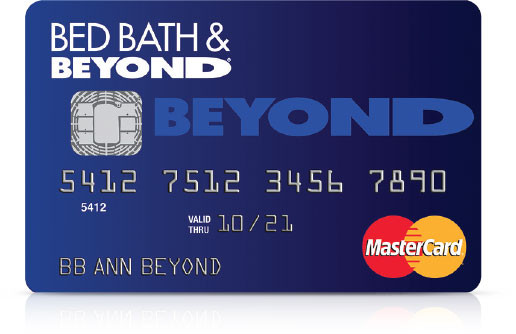

In [5]:
from google.colab.patches import cv2_imshow
cv2_imshow(imageA)

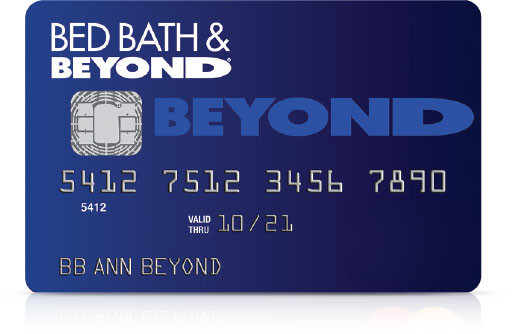

In [6]:
cv2_imshow(imageB)

In [7]:
# convert the images to grayscale
grayA = cv2.cvtColor(imageA, cv2.COLOR_BGR2GRAY)
grayB = cv2.cvtColor(imageB, cv2.COLOR_BGR2GRAY)

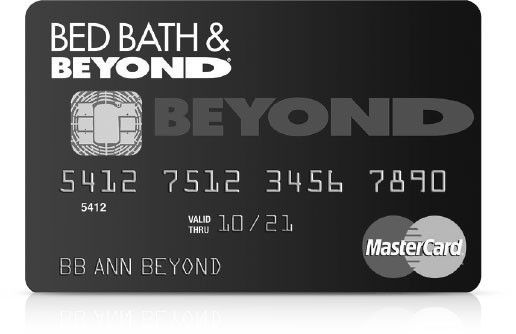

In [9]:
cv2_imshow(grayA)

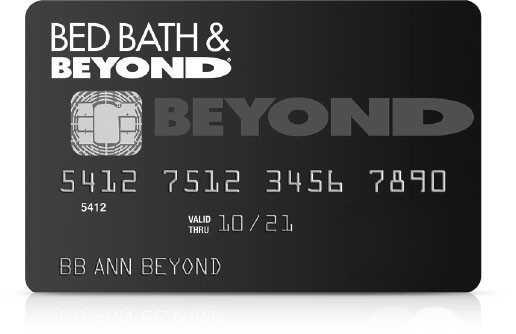

In [10]:
cv2_imshow(grayB)

In [11]:
# compute the Structural Similarity Index (SSIM) between the two
# images, ensuring that the difference image is returned

(score, diff) = compare_ssim(grayA, grayB, full=True)
diff = (diff * 255).astype("uint8")
print("SSIM: {}".format(score))

SSIM: 0.9649225306405751


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.
  after removing the cwd from sys.path.


In [12]:
# threshold the difference image, followed by finding contours(윤곽) to
# obtain the regions of the two input images that differ

thresh = cv2.threshold(diff, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

In [13]:
# loop over the contours
for c in cnts:
	# compute the bounding box of the contour and then draw the
	# bounding box on both input images to represent where the two images differ
	(x, y, w, h) = cv2.boundingRect(c)
	cv2.rectangle(imageA, (x, y), (x + w, y + h), (0, 0, 255), 2)
	cv2.rectangle(imageB, (x, y), (x + w, y + h), (0, 0, 255), 2)

1.Original


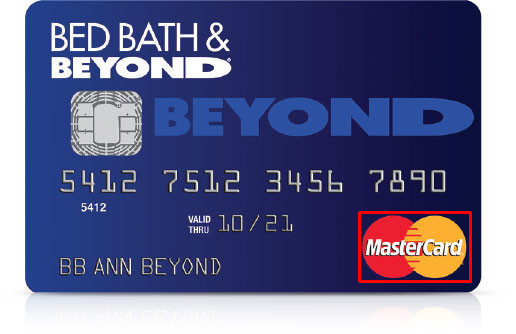



2.Modified


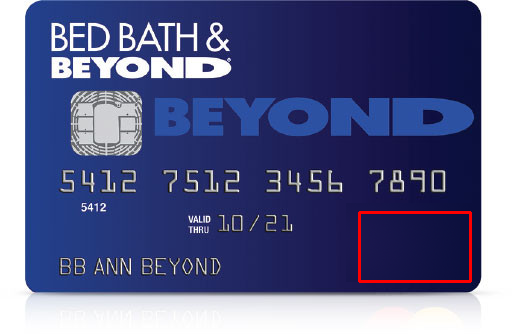



3.Diff


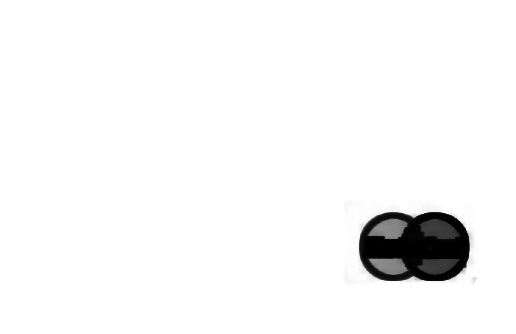



4.Thresh


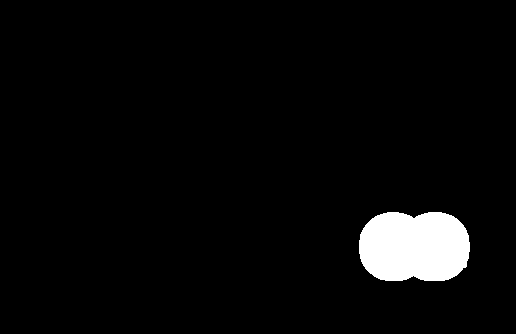

-1

In [22]:
# show the output images
print('1.Original')
cv2_imshow(imageA) # Original
print('\n')
print('2.Modified')
cv2_imshow(imageB) # Modified
print('\n')
print('3.Diff')
cv2_imshow(diff) # Diff
print('\n')
print('4.Thresh')
cv2_imshow(thresh) # Thresh
print('\n')
cv2.waitKey(0)